<a href="https://colab.research.google.com/github/Prateek1337/DDS_Project/blob/master/Human_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
from matplotlib import pyplot as plt
import argparse
import imutils
import cv2
# construct the argument parse and parse the arguments
args = {"images": 'images',
        "Videos": 'Videos'}
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%cd gdrive/My\ Drive/DDS
!ls

[Errno 2] No such file or directory: 'gdrive/My Drive/DDS'
/content/gdrive/My Drive/DDS
download.jpg  videoplayback-1.mp4  videoplayback.mp4  Videos


In [ ]:
def histogram(img):
    color = ('b','g','r')
    for channel,col in enumerate(color):
        histr = cv2.calcHist([img],[channel],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.title('Histogram for color scale picture')
    plt.show()

    from PIL import Image

    im = img

    pix = im

    red = [0]*256
    blue = [0]*256
    green = [0]*256

    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            temp = pix[x,y]
            red[temp[0]] +=1
            green[temp[0]] +=1
            blue[temp[0]] += 1

def dist(red1, red2, blue1, blue2, green1, green2):
    ans = 0
    for i in range (256):
        ans += (red1[i]-red2[i])*2 + (green1[i]-green2[i])*2 + (blue1[i]-blue2[i])*2
    return ans

1


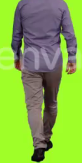

(163, 82, 3)


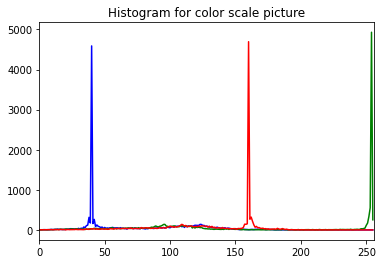

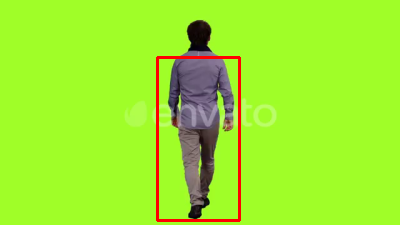

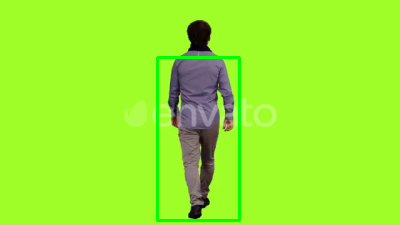

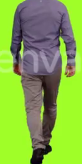

(164, 82, 3)


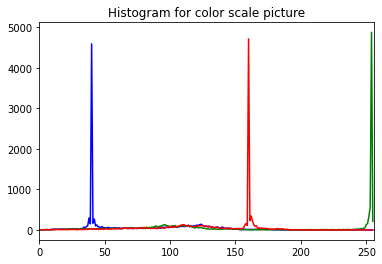

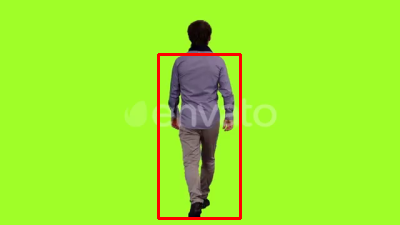

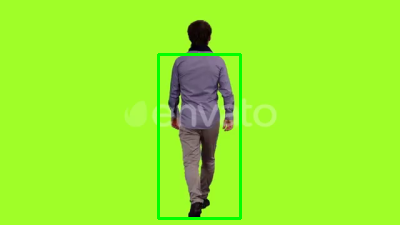

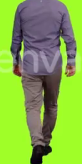

(164, 82, 3)


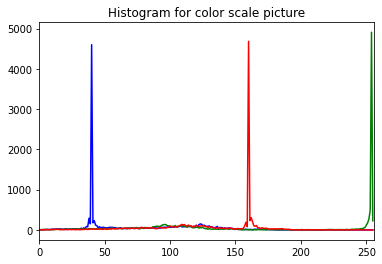

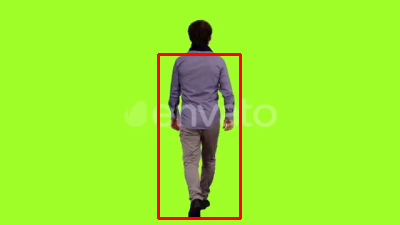

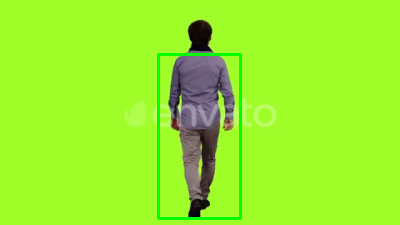

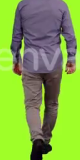

(160, 80, 3)


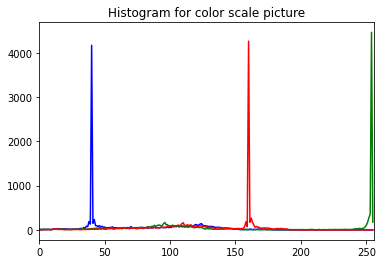

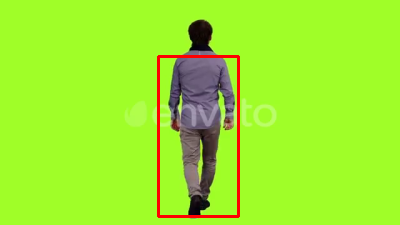

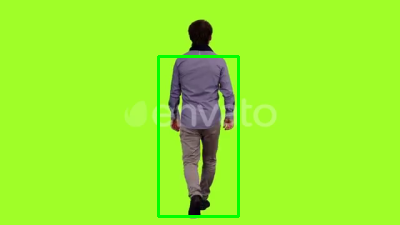

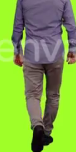

(152, 76, 3)


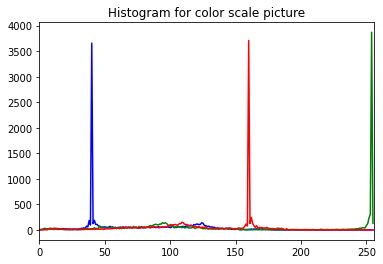

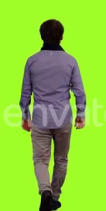

(211, 106, 3)


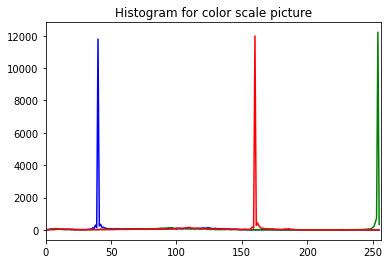

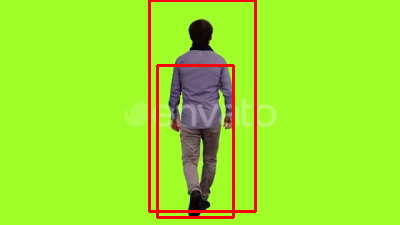

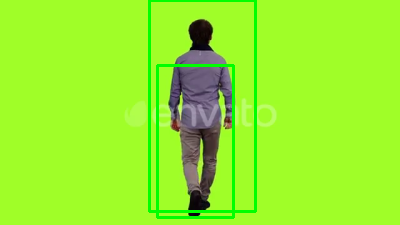

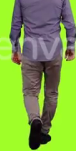

(151, 76, 3)


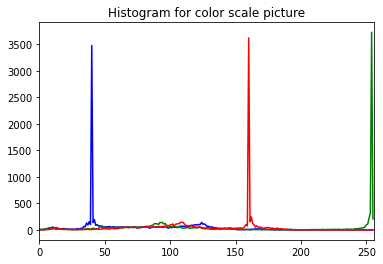

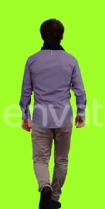

(209, 105, 3)


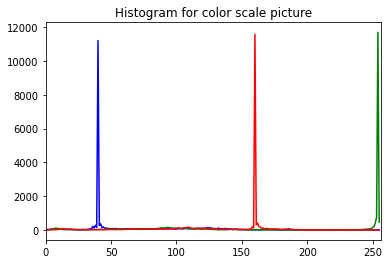

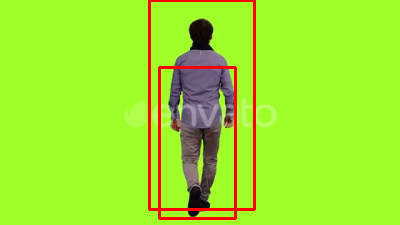

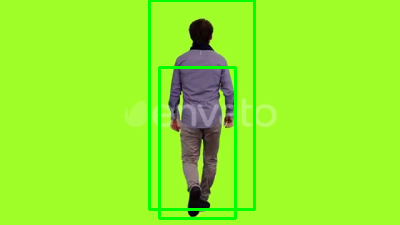

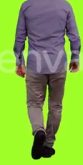

(165, 83, 3)


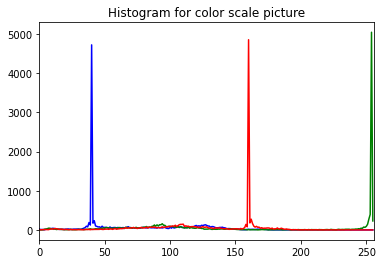

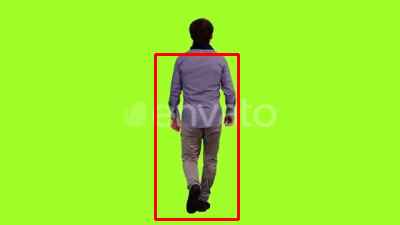

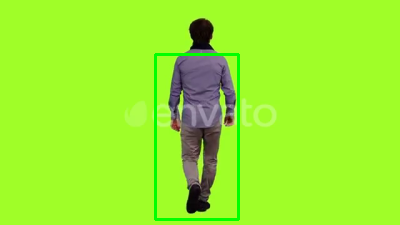

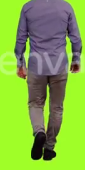

(170, 85, 3)


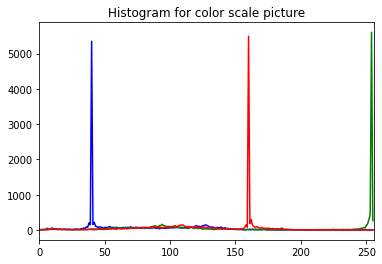

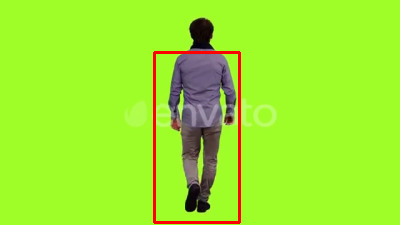

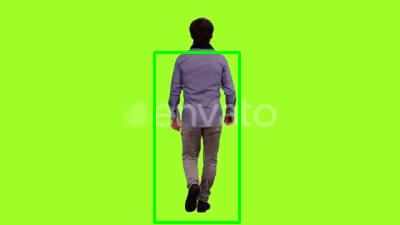

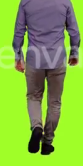

(166, 83, 3)


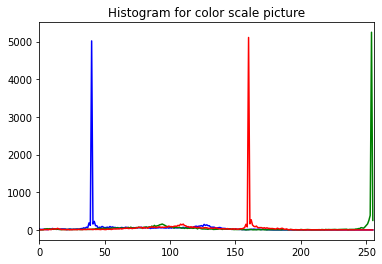

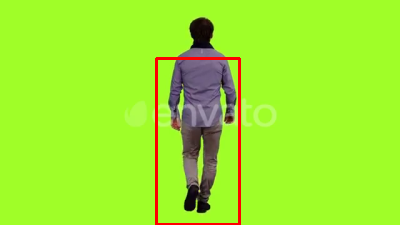

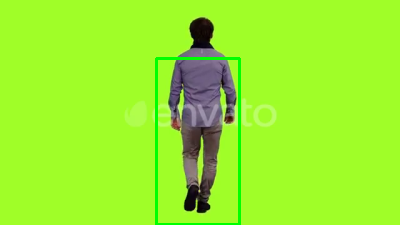

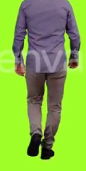

(171, 86, 3)


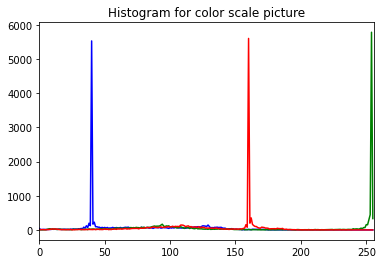

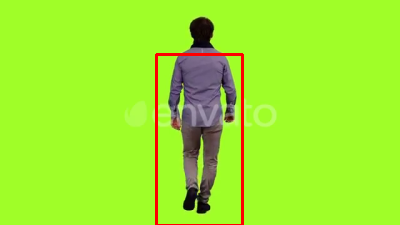

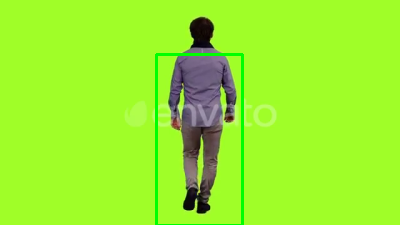

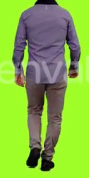

(178, 89, 3)


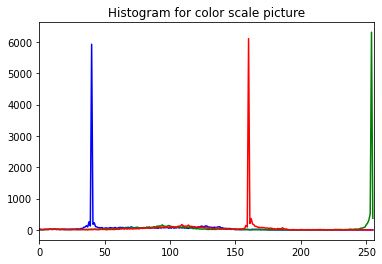

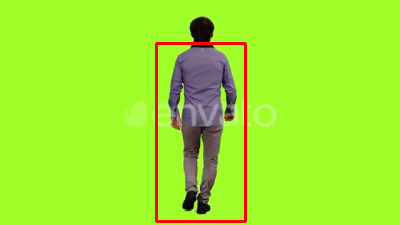

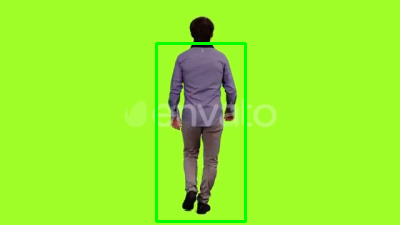

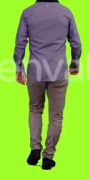

(180, 90, 3)


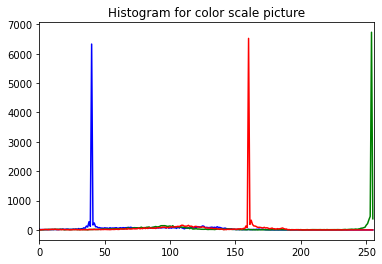

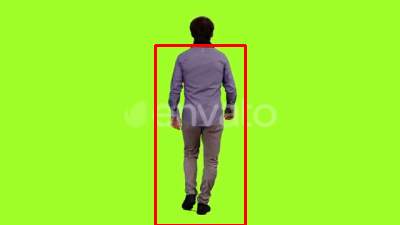

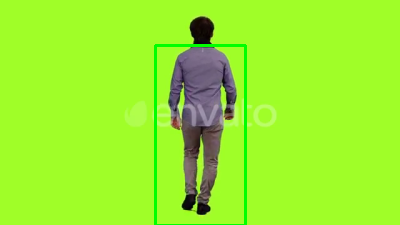

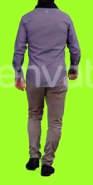

(185, 93, 3)


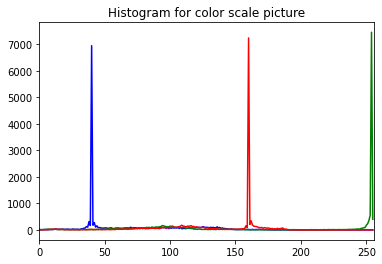

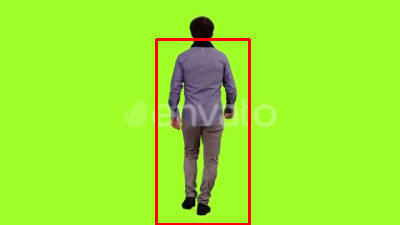

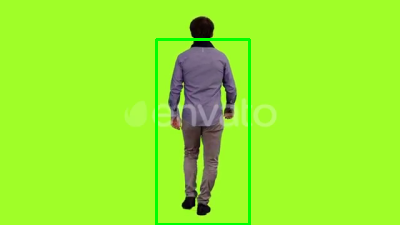

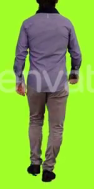

(189, 94, 3)


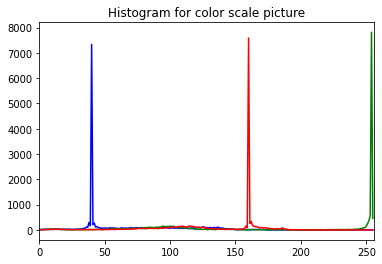

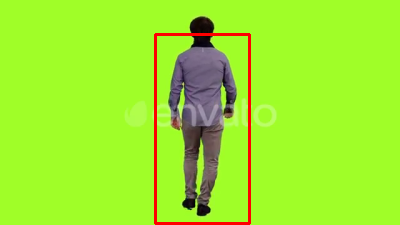

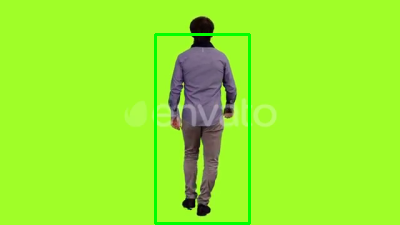

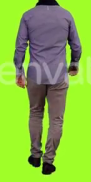

(182, 91, 3)


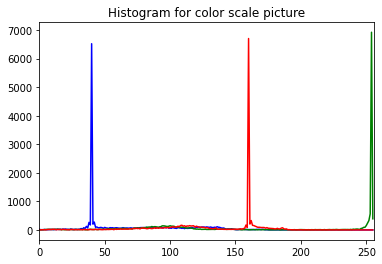

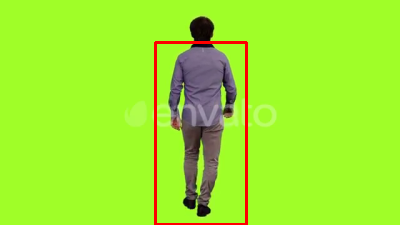

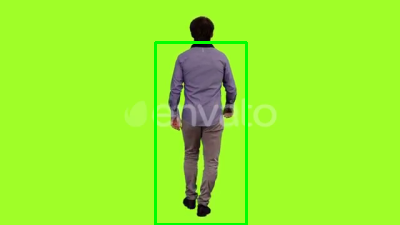

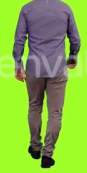

(173, 87, 3)


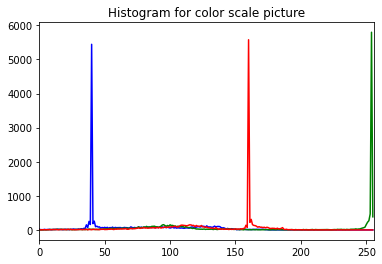

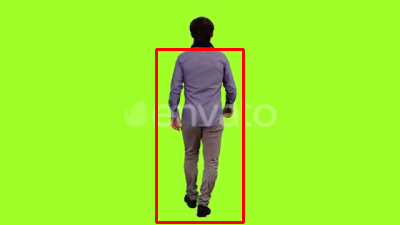

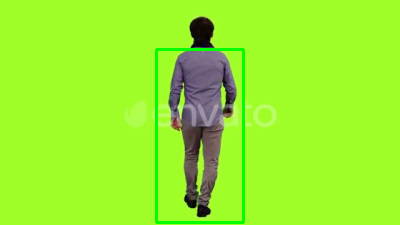

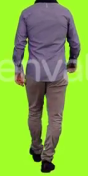

(176, 88, 3)


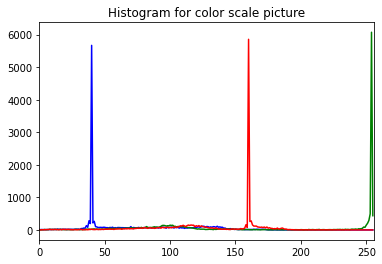

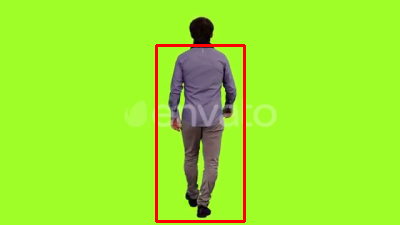

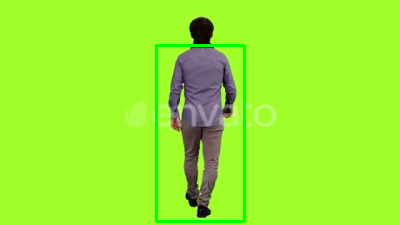

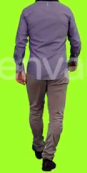

(173, 87, 3)


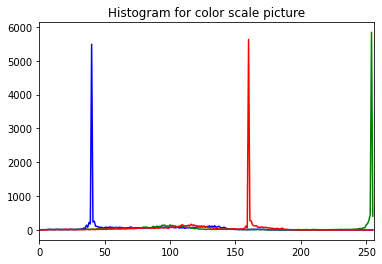

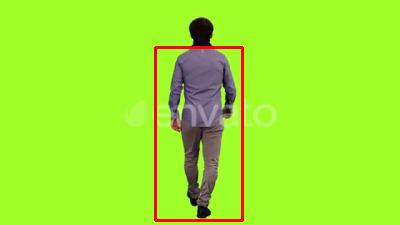

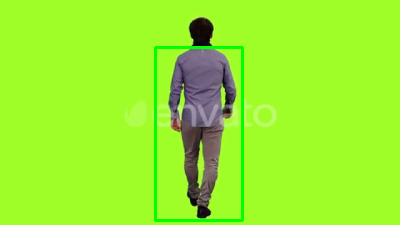

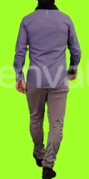

(179, 89, 3)


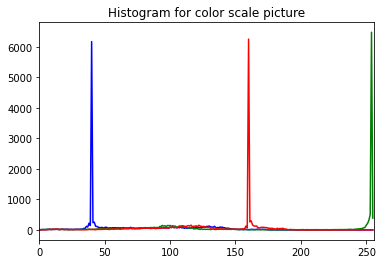

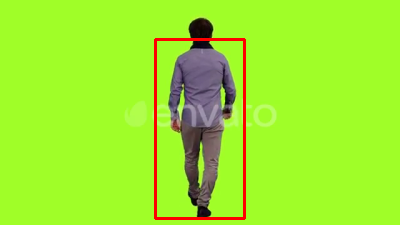

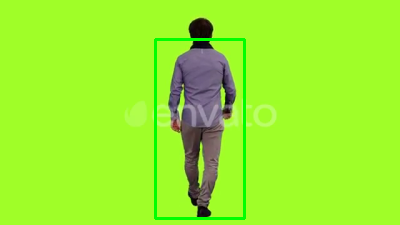

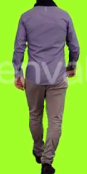

(174, 87, 3)


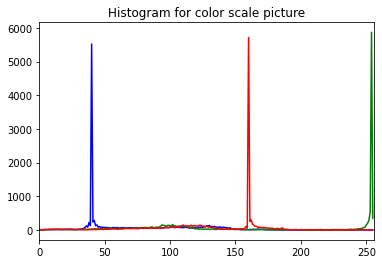

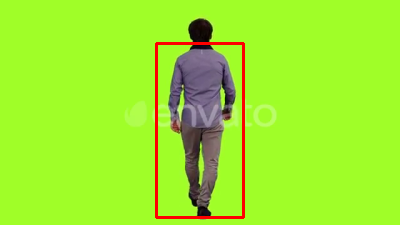

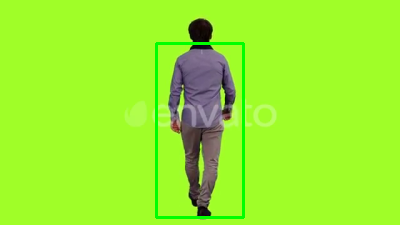

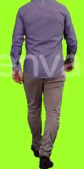

(169, 84, 3)


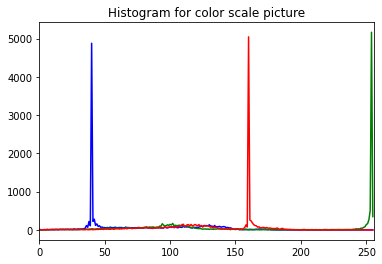

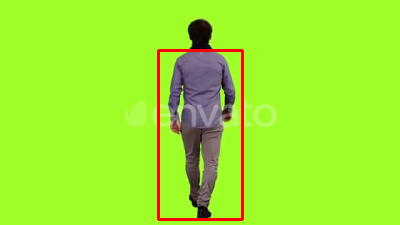

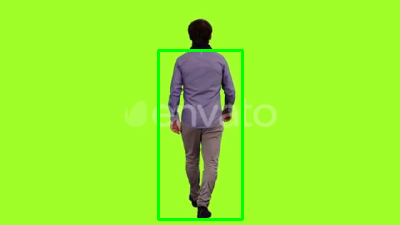

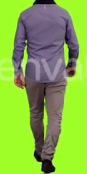

(174, 87, 3)


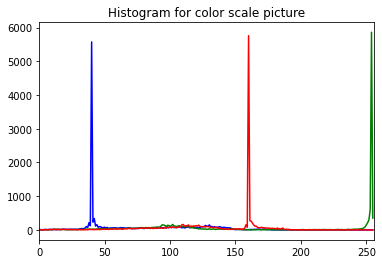

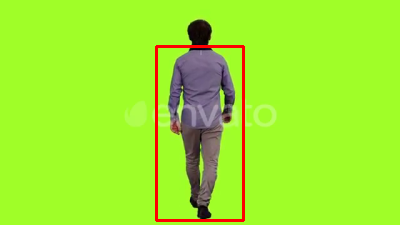

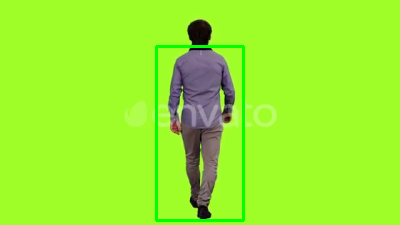

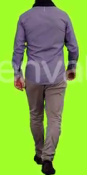

(175, 87, 3)


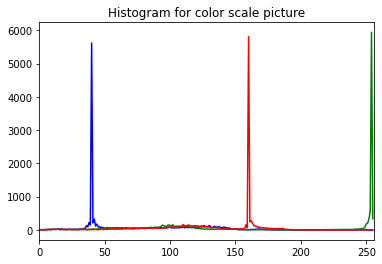

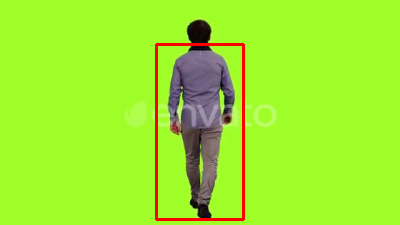

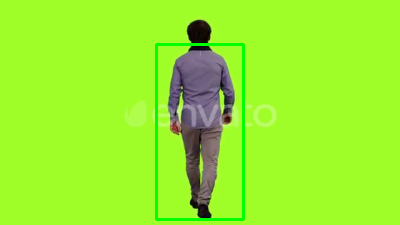

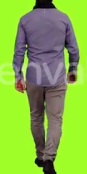

(174, 87, 3)


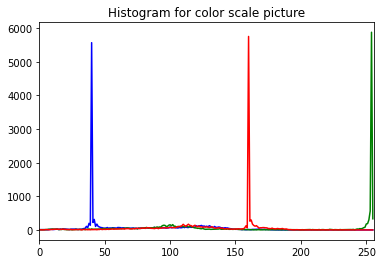

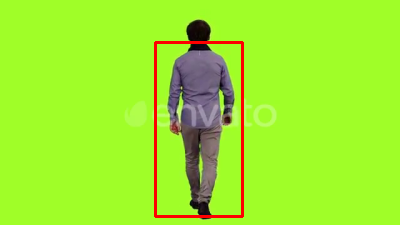

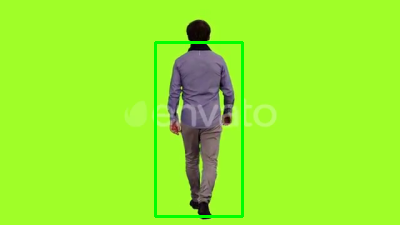

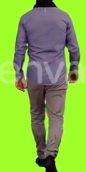

(172, 86, 3)


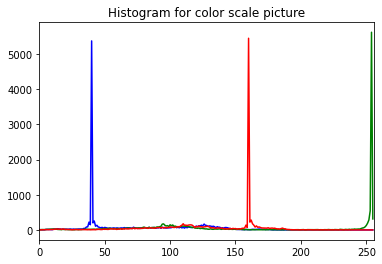

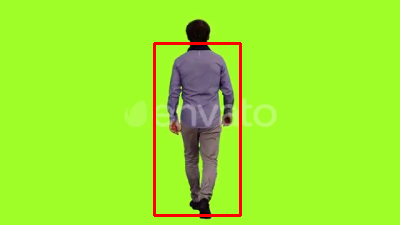

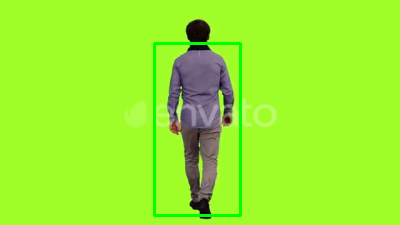

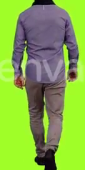

(170, 85, 3)


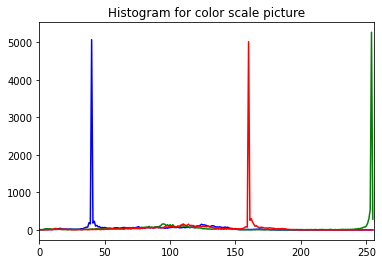

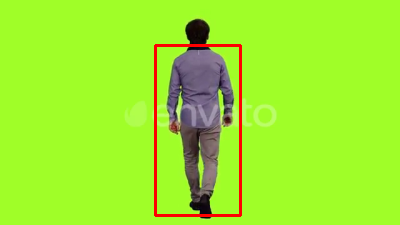

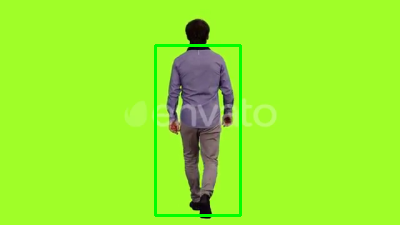

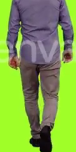

(152, 76, 3)


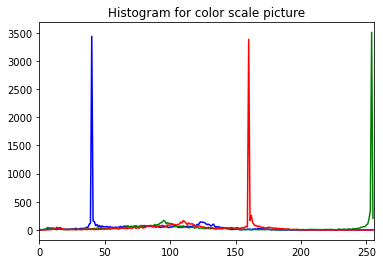

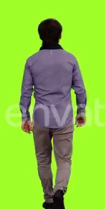

(209, 105, 3)


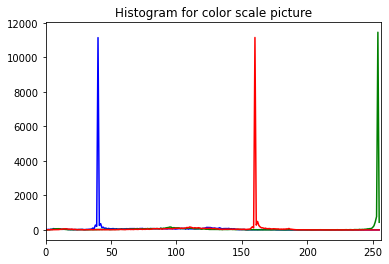

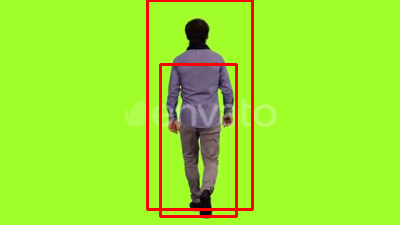

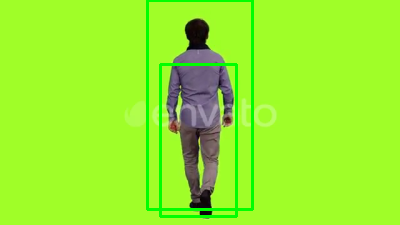

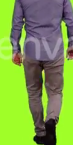

(145, 73, 3)


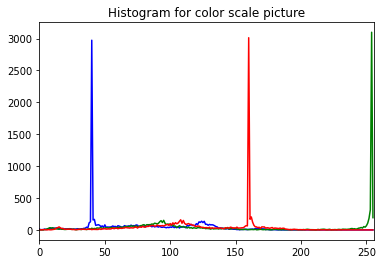

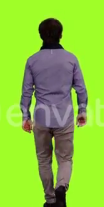

(207, 104, 3)


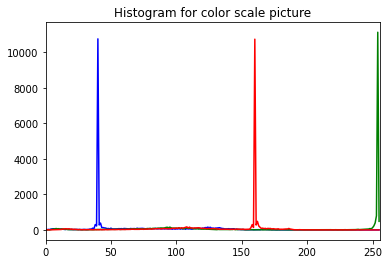

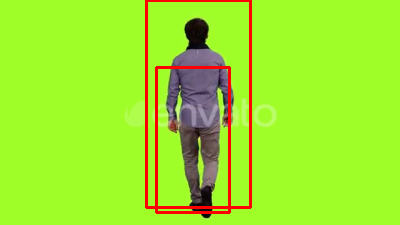

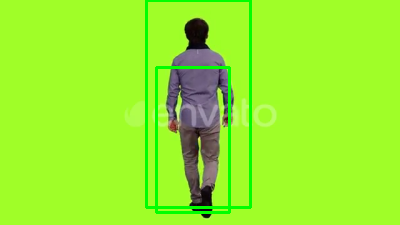

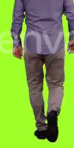

(148, 74, 3)


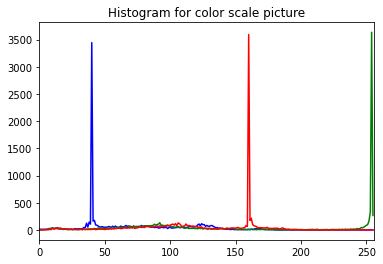

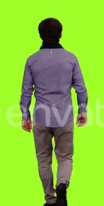

(206, 104, 3)


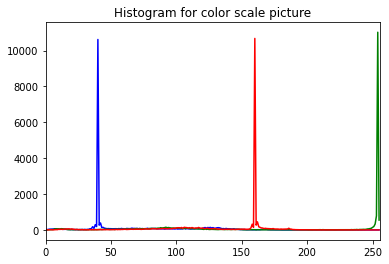

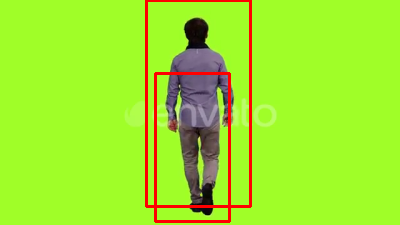

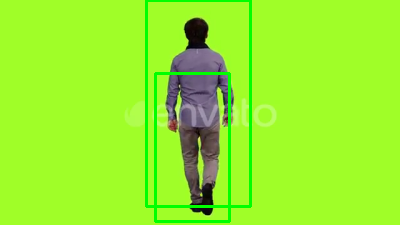

In [ ]:
from google.colab.patches import cv2_imshow
from os import listdir
# loop over the image paths
for path in listdir(args["Videos"]):
	# load the image and resize it to (1) reduce detection time
	# and (2) improve detection accuracy
	print(1)
	cam = cv2.VideoCapture('Videos/'+path) 
	cnt=0
	while(True):
		ret,frame = cam.read()
		cnt=cnt+1
		if(ret and cnt<30):
			image = frame.copy()
			image = imutils.resize(image, width=min(400, image.shape[1]))
			orig = image.copy()
			org_image=image.copy();
			# detect people in the image
			(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
				padding=(8, 8), scale=1.05)
			# draw the original bounding boxes
			for (x, y, w, h) in rects:
				cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
			# apply non-maxima suppression to the bounding boxes using a
			# fairly large overlap threshold to try to maintain overlapping
			# boxes that are still people
			rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
			pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
			# draw the final bounding boxes
			for (xA, yA, xB, yB) in pick:
				crop_img = org_image[yA:yB, xA:xB]
				cv2_imshow(crop_img)
				print(crop_img.shape)
				histogram(crop_img)
				cv2.waitKey(0)
				cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
			# show some information on the number of bounding boxes
			# filename = imagePath[imagePath.rfind("/") + 1:]
			# print("[INFO] {}: {} original boxes, {} after suppression".format(
			# 	filename, len(rects), len(pick)))
			# show the output images
			cv2_imshow(orig)
			cv2_imshow(image)
			cv2.waitKey(0)
		else:
			break
	cam.release() 

In [ ]:
from google.colab.patches import cv2_imshow
# loop over the image paths
for imagePath in paths.list_images(args["images"]):
	# load the image and resize it to (1) reduce detection time
	# and (2) improve detection accuracy
	image = cv2.imread(imagePath)
	image = imutils.resize(image, width=min(400, image.shape[1]))
	orig = image.copy()
	org_image=image.copy();
	# detect people in the image
	(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
		padding=(8, 8), scale=1.05)
	# draw the original bounding boxes
	for (x, y, w, h) in rects:
		cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
	# apply non-maxima suppression to the bounding boxes using a
	# fairly large overlap threshold to try to maintain overlapping
	# boxes that are still people
	rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
	pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
	# draw the final bounding boxes
	for (xA, yA, xB, yB) in pick:
		crop_img = org_image[yA:yB, xA:xB]
		cv2_imshow(crop_img)
		histogram(crop_img)
		cv2.waitKey(0)
		cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
	# show some information on the number of bounding boxes
	filename = imagePath[imagePath.rfind("/") + 1:]
	print("[INFO] {}: {} original boxes, {} after suppression".format(
		filename, len(rects), len(pick)))
	# show the output images
	cv2_imshow(orig)
	cv2_imshow(image)
	cv2.waitKey(0)

error: ignored